### 1. Generate synthetic image with random blobs 

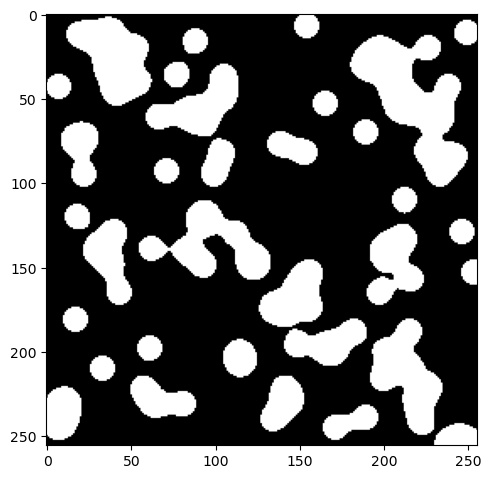

In [5]:
from skimage import data, measure
import skimage as sk 
import matplotlib.pyplot as plt

IG = data.binary_blobs(length=256, blob_size_fraction=0.1,volume_fraction=0.3)
IG

fig = plt.figure(figsize=(5,5))
plt.imshow(IG,cmap='gray')
plt.tight_layout()
plt.show()

# 2. Object segmentation and labeling

- Segmentation of blobs using Otsu's optimal threshold
- Labeling connected regions 
- Visualization



<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


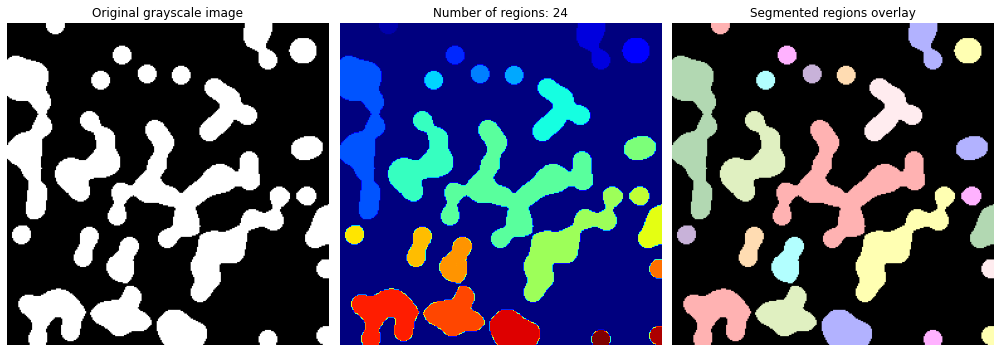

In [2]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image') 
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay') 

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

# 3. Get regional properties in a pandas dataframe

Function documentation with a list of available attributes can be found at https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops_table


In [3]:
import pandas as pd

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent','axis_major_length'])

df_features = pd.DataFrame(props)
df_features.head()


,label,area,eccentricity,extent,axis_major_length
0,1,111,0.789679,0.822222,15.487280
1,2,616,0.870397,0.616617,44.081563
2,3,354,0.324822,0.804545,21.826882
3,4,178,0.150518,0.791111,15.126951
4,5,2683,0.973115,0.573291,146.488609


Represent area of the blobs as a function of the major axis length

<Axes: xlabel='axis_major_length', ylabel='area'>

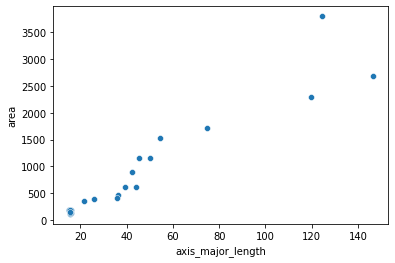

In [4]:
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

Clear correlation between blob's length and area can be observed 

#4. Analyze blobs


Since you have the feature data in a pandas dataframe, you can exploit all the functions of te libraries. For instance: 

How many blobs have an area above the average?

In [5]:
df_features.loc[df_features['area']>=df_features['area'].mean()]

,label,area,eccentricity,extent,axis_major_length
4,5,2683,0.973115,0.573291,146.488609
8,9,1162,0.515202,0.505217,49.995596
9,10,1715,0.818419,0.458066,74.605514
10,11,3800,0.727851,0.307892,124.261189
12,13,2296,0.959009,0.315905,119.614868
19,20,1151,0.597344,0.587245,45.201463
20,21,1521,0.582989,0.625926,54.474629
21,22,886,0.759648,0.791071,42.193059


In [7]:
mean_blobs_area = df_features['area'].mean()
df_large_blobs = df_features.loc[df_features['area']>=mean_blobs_area]
N_large = df_large_blobs.shape[0]
print('there are {} blobs with an area larger or equal the mean area {}'.format(N_large,mean_blobs_area))

there are 8 blobs with an area larger or equal the mean area 819.2083333333334


Represent the blobs that have an area smaller than the average blob's area

In [8]:
df_small_blobs = df_features.loc[df_features['area']<mean_blobs_area]
N_small = df_small_blobs.shape[0]
print('there are {} blobs with an area smaller than the mean area {}'.format(N_small,mean_blobs_area))

there are 16 blobs with an area smaller than the mean area 819.2083333333334


find the labels of small and large blobs

In [9]:
labels_small = df_small_blobs['label'].values
print('labels of small blobs: {}'.format(labels_small))
labels_large = df_large_blobs['label'].values
print('labels of large blobs: {}'.format(labels_large))


labels of small blobs: [ 1  2  3  4  6  7  8 12 14 15 16 17 18 19 23 24]
labels of large blobs: [ 5  9 10 11 13 20 21 22]


Create a binary mask with the large and small blobs

In [11]:
import numpy as np
mask_small_blobs = np.isin(label_image,labels_small)
mask_large_blobs = np.isin(label_image,labels_large)

Represent the large and small blobs

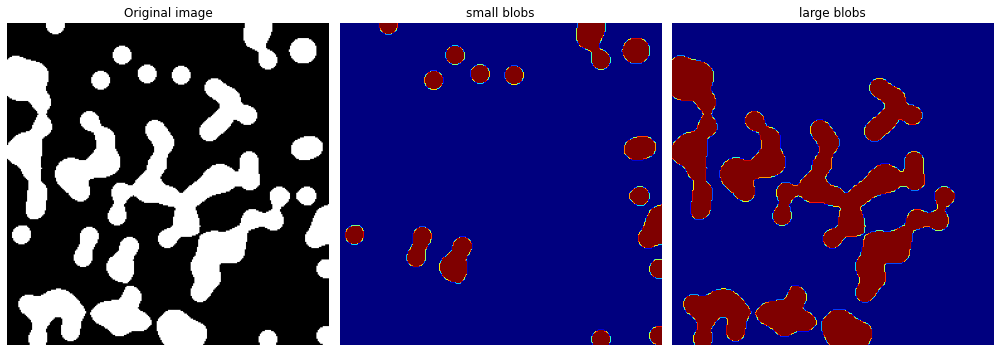

In [12]:
# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original image') 
ax[1].imshow(mask_small_blobs,cmap=plt.cm.jet)
ax[1].set_title('small blobs') # set figure title
ax[2].imshow(mask_large_blobs,cmap=plt.cm.jet)
ax[2].set_title('large blobs') 

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()